## Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import IPython
import numpy as np
import wave
from sklearn.cluster import KMeans
import os
from PIL import Image
from numpy import asarray
import cv2
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from keras import Input
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,AveragePooling2D,GlobalMaxPooling2D,MaxPool2D,UpSampling2D,concatenate,Dropout
from sklearn.metrics import *
from matplotlib import pyplot
from tensorflow.keras.optimizers import Adam
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [7]:
print(tf.__version__)


2.8.0


# Load and preprocess images

In [8]:
base_covid_path='/content/drive/MyDrive/PRML Course Project COVID-19 Using chest xray/Images/COVID/'
base_no_covid_path='/content/drive/MyDrive/PRML Course Project COVID-19 Using chest xray/Images/Non-COVID/'


In [9]:
base_masked_covid_path='/content/drive/MyDrive/PRML Course Project COVID-19 Using chest xray/Masked Images/COVID/'
base_masked_no_covid_path='/content/drive/MyDrive/PRML Course Project COVID-19 Using chest xray/Masked Images/Non-COVID/'


In [10]:
image_count = len(list(os.listdir(base_covid_path)))
print(image_count)

4043


(1056, 1336)


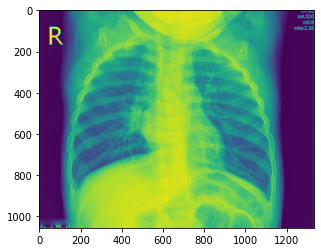

In [11]:
covid=list(os.listdir(base_covid_path))
# PIL.Image.open(base_covid_path+str(covid[0]))
img = PIL.Image.open(base_covid_path+covid[0])
numpydata = asarray(img)
print(numpydata.shape)
plt.imshow(numpydata)

# Create a dataset

In [12]:
batch_size = 32
img_height = 224
img_width = 224

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  base_covid_path[:-6],
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9535 files belonging to 2 classes.
Using 7628 files for training.


In [14]:
train_ds_normal = tf.keras.utils.image_dataset_from_directory(
  base_covid_path[:-6],
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9535 files belonging to 2 classes.
Using 7628 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  base_covid_path[:-6],
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9535 files belonging to 2 classes.
Using 1907 files for validation.


In [16]:
val_ds_normal = tf.keras.utils.image_dataset_from_directory(
  base_covid_path[:-6],
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9535 files belonging to 2 classes.
Using 1907 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['COVID', 'Non-COVID']


# Lung segmentation performed in : [Lung Segmentation.ipynb](https://colab.research.google.com/drive/1rN0yI11aPj_F9wwUu8nuyTjawifl4Kzs?usp=sharing)

# Masked Dataset creation

In [18]:
train_ds_masked = tf.keras.utils.image_dataset_from_directory(
  base_masked_covid_path[:-6],
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9542 files belonging to 2 classes.
Using 7634 files for training.


In [19]:
val_ds_masked = tf.keras.utils.image_dataset_from_directory(
  base_masked_covid_path[:-6],
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9542 files belonging to 2 classes.
Using 1908 files for validation.


In [20]:
train_ds_masked_rgb = tf.keras.utils.image_dataset_from_directory(
  base_masked_covid_path[:-6],
  validation_split=0.2,
  subset="training",
  color_mode='rgb',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9542 files belonging to 2 classes.
Using 7634 files for training.


In [21]:
val_ds_masked_rgb = tf.keras.utils.image_dataset_from_directory(
  base_masked_covid_path[:-6],
  validation_split=0.2,
  subset="validation",
  color_mode='rgb',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9542 files belonging to 2 classes.
Using 1908 files for validation.


# Data Visualisation

Text(0.5, 1.0, 'Count of Image')

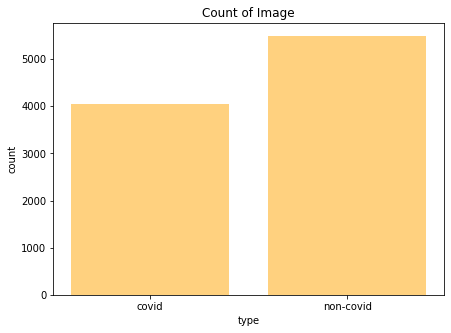

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(['covid','non-covid'],[4043,5492],color='orange',alpha=0.5)
plt.xlabel('type')
plt.ylabel('count')
plt.title('Count of Image')

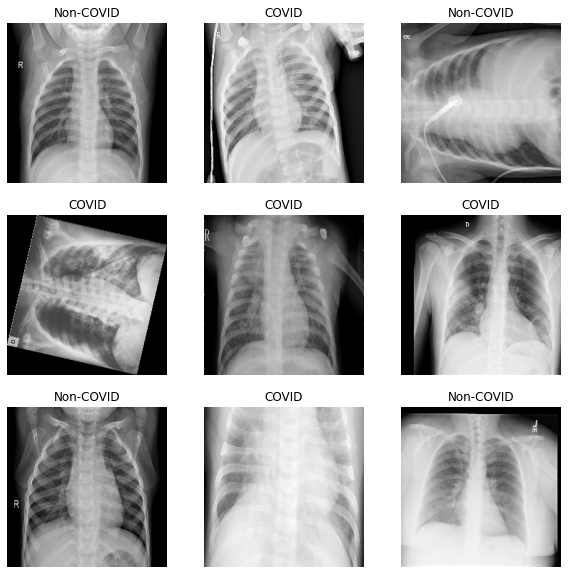

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().flatten().reshape(224,224).astype("uint8"),cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

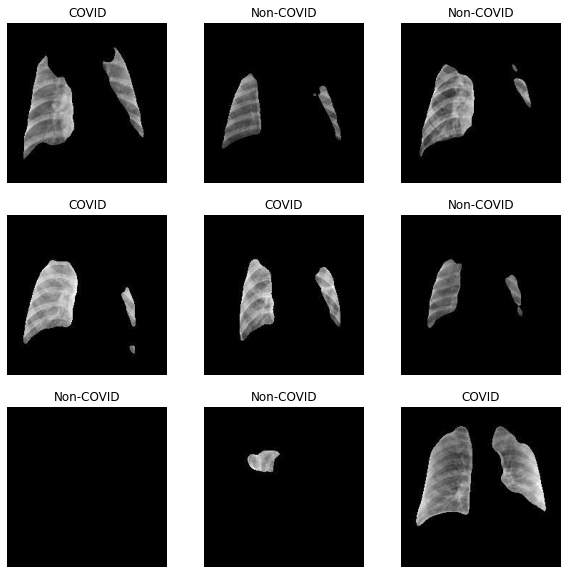

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds_masked.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().flatten().reshape(224,224).astype("uint8"),cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Supervised and Unsupervised Learning Models

## Dimensionality reduction using PCA

In [ ]:
dic={}

In [ ]:
c=0
lst=list(os.listdir(base_covid_path))
for i in tqdm(range(len(list(os.listdir(base_covid_path))))):
  dic[c]=base_covid_path+lst[i]
  c+=1

100%|██████████| 4043/4043 [00:00<00:00, 449302.40it/s]


In [ ]:
dic_no_covid={}

In [ ]:
c=0
lst=list(os.listdir(base_no_covid_path))
for i in tqdm(range(len(list(os.listdir(base_no_covid_path))))):
  dic_no_covid[c]=base_no_covid_path+lst[i]
  c+=1

100%|██████████| 5499/5499 [00:00<00:00, 516966.89it/s]


covid-1
non-covid - 0

### Selecting Number of Principle Components

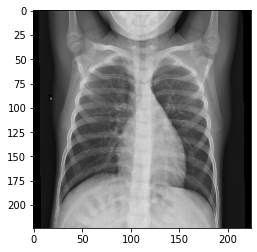

In [ ]:
# Loading the image 
img = cv2.imread(dic_no_covid[8]) #you can use any image you want.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
plt.imshow(img,cmap='gray')

In [ ]:
pca = PCA(n_components=20)
pca.fit(img)
trans_img = pca.transform(img)

In [ ]:
trans_img.flatten().shape

(4480,)

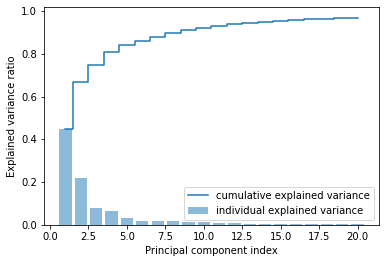

[0.44752704 0.66650101 0.74633462 0.80896806 0.84227906 0.86169685
 0.88013945 0.89601349 0.90946089 0.92243685 0.93224648 0.93903008
 0.94503678 0.94965506 0.95421511 0.95794306 0.96142749 0.96431333
 0.96676989 0.96888125]


In [ ]:
var=(pca.explained_variance_ratio_)
cum_var_exp = np.cumsum(var)
cum_var_exp = np.cumsum(var)

# plot explained variances
plt.bar(range(1,len(var)+1), var, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,len(var)+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

print(cum_var_exp)

Taking 20 PCs to cover 95% variance

In [ ]:
rows = 1
columns = 2
img_transformed = pca.inverse_transform(trans_img)

Text(0.5, 1.0, 'Blurred Image after applying PCA')

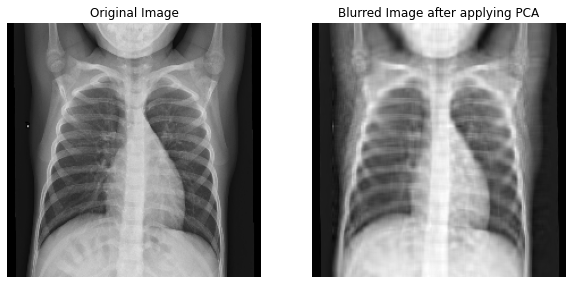

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(rows, columns, 1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(img_transformed,cmap='gray')
plt.axis('off')
plt.title("Blurred Image after applying PCA")

### Implementing PCA

In [ ]:
dic_keys=list(dic.keys())
array_covid=np.zeros((1,4481))
for i in tqdm(range(len(dic_keys))):
  img = cv2.imread(dic[i]) #you can use any image you want.
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
  pca = PCA(n_components=20)
  pca.fit(img)
  trans_img = pca.transform(img)
  array_covid=np.append(array_covid,np.concatenate((trans_img.flatten(),np.array([1])),axis=0).reshape(1,4481),axis=0)

100%|██████████| 4043/4043 [10:10<00:00,  6.62it/s]


In [ ]:
array_covid.shape

(4044, 4481)

In [ ]:
dic_no_covid_keys=list(dic_no_covid.keys())
array_no_covid=np.zeros((1,4481))
for i in tqdm(range(len(dic_no_covid_keys))):
  img = cv2.imread(dic_no_covid[i]) #you can use any image you want.
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
  pca = PCA(n_components=20)
  pca.fit(img)
  trans_img = pca.transform(img)
  array_no_covid=np.append(array_no_covid,np.concatenate((trans_img.flatten(),np.array([0])),axis=0).reshape(1,4481),axis=0)

100%|██████████| 5499/5499 [1:00:13<00:00,  1.52it/s]


In [ ]:
array_no_covid.shape

(5500, 4481)

In [ ]:
data_array=np.concatenate((array_covid,array_no_covid),axis=0)
data_array.shape

(9544, 4481)

In [ ]:
data_array

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.10856861e+02, -8.92770069e+01,  1.89969933e+02, ...,
         2.12241408e+02,  2.75346175e+01,  1.00000000e+00],
       [ 4.67311279e+02,  4.83250224e+02,  2.09265275e+02, ...,
         8.42848393e+00, -2.24116042e+01,  1.00000000e+00],
       ...,
       [ 1.85998917e+03,  7.51338959e+02, -1.44910713e+02, ...,
        -6.50542726e+00, -5.60622350e+00,  0.00000000e+00],
       [-1.94494096e+02,  1.60857843e+03, -2.23059472e+02, ...,
         2.62436980e+01, -4.17505449e+01,  0.00000000e+00],
       [ 9.91634995e+02, -5.33717536e+01, -2.37820558e+02, ...,
         8.35622774e-01,  2.61534422e+00,  0.00000000e+00]])

## Train Test Split

In [ ]:
X=data_array.T[:-1].T
Y=data_array.T[-1].T

In [ ]:
X[0].shape

(4480,)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,Y,train_size=0.7)


x_train

array([[ 2.09778368e+02, -2.92940631e+02,  2.49753651e+02, ...,
        -1.62329247e+01,  2.13703413e+00,  1.99843059e+01],
       [ 1.36615148e+03,  7.65285291e+02,  7.68907744e+02, ...,
        -1.92766532e+01,  7.90253165e+00, -1.72676924e+01],
       [ 1.93632348e+03, -6.38969653e+01, -2.46321598e+02, ...,
        -3.81712415e+01,  6.15972895e+01, -7.95776705e+01],
       ...,
       [-2.88263033e+02,  1.16923249e+02,  3.19086598e+02, ...,
         7.56901083e+01,  7.62038309e+00, -5.17805250e+01],
       [ 8.64381639e+02,  6.16558099e+02, -2.93787194e+02, ...,
         2.98933298e+00, -2.29590258e+01,  9.71659269e-01],
       [ 1.10172760e+03,  1.07101685e+03,  2.15248440e+02, ...,
        -6.05153598e+00,  1.32382859e+01,  5.14522369e+00]])

In [ ]:
y_train

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
x_test

array([[ 1.03773185e+03,  8.24421983e+02, -2.62541655e+02, ...,
         2.79463813e+01, -4.33645701e+01, -1.72645542e+00],
       [ 1.66338595e+03, -3.23714772e+01,  4.53253760e+02, ...,
        -1.34566777e+00,  9.17533175e-02, -6.96161060e+00],
       [-1.07025610e+03,  4.42385221e+02,  3.20649987e+02, ...,
         9.77647113e+00,  6.55467064e+00,  1.73599433e+00],
       ...,
       [ 1.58037868e+03, -8.98278532e+00,  1.24008035e+02, ...,
        -1.26646622e+01, -1.34422207e+01,  1.18274394e+01],
       [ 1.04842268e+03,  1.30737714e+02, -3.09411666e+00, ...,
         2.11427147e+00, -3.62882063e+00, -1.37821728e+01],
       [ 6.97358815e+00, -3.69243647e-01, -9.63446562e+01, ...,
         6.10083187e+01,  2.92841071e+00, -3.48603533e+00]])

In [ ]:
y_test

array([1., 0., 1., ..., 0., 0., 1.])

## K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
kmeans.fit(x_train)
y_pred_kmeans = kmeans.predict(x_test)

In [ ]:
acc_kmeans = accuracy_score(y_pred_kmeans,y_test)
f1_kmeans = f1_score(y_pred_kmeans,y_test)
aucScore_kmeans = roc_auc_score(y_pred_kmeans,y_test)

print("Accuracy :" + str(acc_kmeans))
print("F1 Score :" + str(f1_kmeans))
print("Area Under Curve :" + str(aucScore_kmeans))
print(classification_report(y_pred_kmeans,y_test))

Accuracy :0.4511173184357542
F1 Score :0.4304347826086956
Area Under Curve :0.45950554764758944
              precision    recall  f1-score   support

           0       0.42      0.54      0.47      1287
           1       0.50      0.38      0.43      1577

    accuracy                           0.45      2864
   macro avg       0.46      0.46      0.45      2864
weighted avg       0.46      0.45      0.45      2864



## Decision Tree Classifier

In [ ]:
dtc=DecisionTreeClassifier(max_depth=8,min_samples_leaf=2,min_samples_split=3)
dtc.fit(x_train, y_train)
y_pred_dtc=dtc.predict(x_test)

In [ ]:
acc_dtc = accuracy_score(y_pred_dtc,y_test)
f1_dtc = f1_score(y_pred_dtc,y_test)
aucScore_dtc = roc_auc_score(y_pred_dtc,y_test)

print("Accuracy :" + str(acc_dtc))
print("F1 Score :" + str(f1_dtc))
print("Area Under Curve :" + str(aucScore_dtc))
print(classification_report(y_pred_dtc,y_test))

Accuracy :0.7328910614525139
F1 Score :0.6911586596689543
Area Under Curve :0.7266172141879719
              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76      1570
         1.0       0.72      0.66      0.69      1294

    accuracy                           0.73      2864
   macro avg       0.73      0.73      0.73      2864
weighted avg       0.73      0.73      0.73      2864



In [ ]:
acc_dtc = accuracy_score(y_pred_dtc,y_test)
acc_dtc

In [ ]:
print(classification_report(y_pred_dtc,y_test))

In [ ]:
auc_dtc = roc_auc_score(y_pred_dtc,y_test)
auc_dtc

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,3,4,5,6,7,8], 'min_samples_split':[2,3,4,5,6,7], 'min_samples_leaf':[2,3,4,5,6,7]}
dtc=DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters)
clf.fit(x_train, y_train)
y_pred_here=clf.predict(x_test)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

## Random Forest Classifier

In [ ]:
rfc=RandomForestClassifier(random_state=42,n_estimators=500,max_depth=9,min_samples_leaf=2,min_samples_split=3)
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)

In [ ]:
y_pred_rfc_proba=rfc.predict_proba(x_test)

In [ ]:
acc_rfc = accuracy_score(y_pred_rfc,y_test)
f1_rfc = f1_score(y_pred_rfc,y_test)
aucScore_rfc = roc_auc_score(y_pred_rfc,y_test)

print("Accuracy :" + str(acc_rfc))
print("F1 Score :" + str(f1_rfc))
print("Area Under Curve :" + str(aucScore_rfc))
print(classification_report(y_pred_rfc,y_test))

Accuracy :0.7936452513966481
F1 Score :0.7440450411433521
Area Under Curve :0.7882281342552944
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83      1738
         1.0       0.73      0.76      0.74      1126

    accuracy                           0.79      2864
   macro avg       0.78      0.79      0.79      2864
weighted avg       0.80      0.79      0.79      2864



In [ ]:
acc_rfc = accuracy_score(y_pred_rfc,y_test)
acc_rfc

0.7891061452513967

No Skill: ROC AUC=0.500
RFC: ROC AUC=0.877


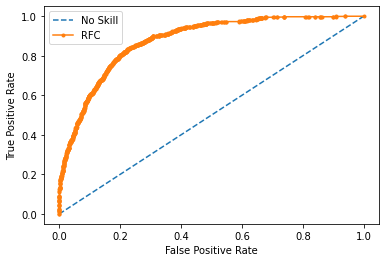

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_rfc_proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rfc_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RFC: ROC AUC=%.3f' % (rfc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,3,4,5,6,7,8], 'min_samples_split':[2,3,4,5,6,7], 'min_samples_leaf':[2,3,4,5,6,7]}
# parameters = {"n_estimators":[10,20,30,50,70,100,200,300,450,500,700]}
rfc=RandomForestClassifier(random_state=42,n_estimators=500)
clf = GridSearchCV(rfc, parameters)
clf.fit(x_train, y_train)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

## XG Boost Classifier

In [ ]:
xgb1 = XGBClassifier(n_estimators=500) 
xgb1.fit(x_train, y_train)
y_pred_xgb=xgb1.predict(x_test)

In [ ]:
acc_xgb = (accuracy_score(y_test, y_pred_xgb))
acc_xgb

0.8184357541899442

In [ ]:
acc_xgb = accuracy_score(y_pred_xgb,y_test)
f1_xgb = f1_score(y_pred_xgb,y_test)
aucScore_xgb = roc_auc_score(y_pred_xgb,y_test)

print("Accuracy :" + str(acc_xgb))
print("F1 Score :" + str(f1_xgb))
print("Area Under Curve :" + str(aucScore_xgb))
print(classification_report(y_pred_xgb,y_test))

Accuracy :0.8184357541899442
F1 Score :0.7762478485370052
Area Under Curve :0.8137234904572512
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1723
         1.0       0.76      0.79      0.78      1141

    accuracy                           0.82      2864
   macro avg       0.81      0.81      0.81      2864
weighted avg       0.82      0.82      0.82      2864



## Light GBM

In [ ]:
lgbm = LGBMClassifier(n_estimators=450)
lgbm.fit(x_train, y_train)
y_pred_lgbm=lgbm.predict(x_test)

In [ ]:
acc_lgbm = accuracy_score(y_pred_lgbm,y_test)
f1_lgbm = f1_score(y_pred_lgbm,y_test)
aucScore_lgbm = roc_auc_score(y_pred_lgbm,y_test)

print("Accuracy :" + str(acc_lgbm))
print("F1 Score :" + str(f1_lgbm))
print("Area Under Curve :" + str(aucScore_lgbm))
print(classification_report(y_pred_lgbm,y_test))

Accuracy :0.821927374301676
F1 Score :0.7799827437446074
Area Under Curve :0.8175554100432375
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1729
         1.0       0.76      0.80      0.78      1135

    accuracy                           0.82      2864
   macro avg       0.81      0.82      0.82      2864
weighted avg       0.82      0.82      0.82      2864



## Logistic Regression

In [ ]:
lgr = LogisticRegression(random_state=42)
lgr.fit(x_train, y_train)
y_pred_lgr=lgr.predict(x_test)

In [ ]:
acc_lgr = accuracy_score(y_pred_lgr,y_test)
f1_lgr = f1_score(y_pred_lgr,y_test)
aucScore_lgr = roc_auc_score(y_pred_lgr,y_test)

print("Accuracy :" + str(acc_lgr))
print("F1 Score :" + str(f1_lgr))
print("Area Under Curve :" + str(aucScore_lgr))
print(classification_report(y_pred_lgr,y_test))

Accuracy :0.6836592178770949
F1 Score :0.6157760814249365
Area Under Curve :0.673649018051724
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73      1689
         1.0       0.61      0.62      0.62      1175

    accuracy                           0.68      2864
   macro avg       0.67      0.67      0.67      2864
weighted avg       0.68      0.68      0.68      2864



In [ ]:
accuracy_score(y_pred_lgr,y_test)

0.6812150837988827

## SVM

In [ ]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(x_train, y_train)

y_pred_svm=svm.predict(x_test)
accuracy_score_matrix_lr=(accuracy_score(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
f1_score_matrix_lr=f1s(y_test,y_pred_svm,average="weighted")
precision_score_matrix_lr=ps(y_test,y_pred_svm,average="weighted")

0.7601256983240223


In [ ]:
acc_svm = accuracy_score(y_pred_svm,y_test)
f1_svm = f1_score(y_pred_svm,y_test)
aucScore_svm = roc_auc_score(y_pred_svm,y_test)

print("Accuracy :" + str(acc_svm))
print("F1 Score :" + str(f1_svm))
print("Area Under Curve :" + str(aucScore_svm))
print(classification_report(y_pred_svm,y_test))

Accuracy :0.7601256983240223
F1 Score :0.695883134130146
Area Under Curve :0.7542237385960098
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80      1788
         1.0       0.66      0.73      0.70      1076

    accuracy                           0.76      2864
   macro avg       0.75      0.75      0.75      2864
weighted avg       0.77      0.76      0.76      2864



## Comparitive Analysis

Text(0.5, 1.0, 'Comparing Accuracies')

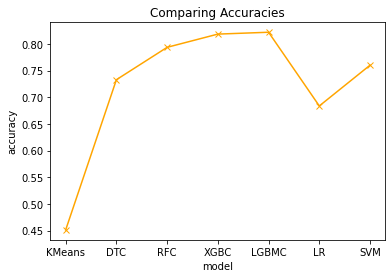

In [ ]:
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[acc_kmeans,acc_dtc,acc_rfc,acc_xgb,acc_lgbm,acc_lgr,acc_svm],marker='x',color='orange')
plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('Comparing Accuracies')

Text(0.5, 1.0, 'Comparing F1 Scores')

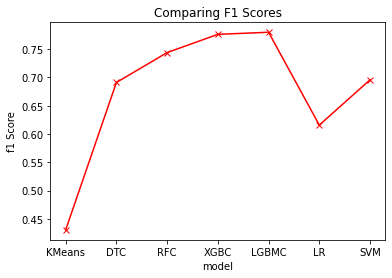

In [ ]:
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[f1_kmeans,f1_dtc,f1_rfc,f1_xgb,f1_lgbm,f1_lgr,f1_svm],marker='x',color='red')
plt.xlabel('model')
plt.ylabel('f1 Score')
plt.title('Comparing F1 Scores')

Text(0.5, 1.0, 'Comparing AUC')

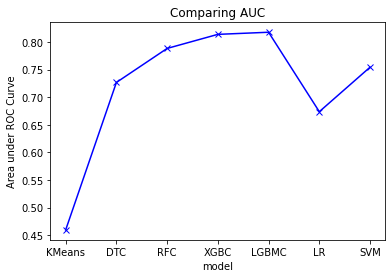

In [ ]:
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[aucScore_kmeans,aucScore_dtc,aucScore_rfc,aucScore_xgb,aucScore_lgbm,aucScore_lgr,aucScore_svm],marker='x',color='blue')
plt.xlabel('model')
plt.ylabel('Area under ROC Curve')
plt.title('Comparing AUC')

# Supervised and Unsupervised learning models on Masked Images

## Dimensionality reduction using PCA on Masked Images

In [ ]:
dic={}

In [ ]:
c=0
lst=list(os.listdir(base_masked_covid_path))
for i in tqdm(range(len(list(os.listdir(base_masked_covid_path))))):
  dic[c]=base_masked_covid_path+lst[i]
  c+=1

100%|██████████| 4043/4043 [00:00<00:00, 1162114.25it/s]


In [ ]:
dic_no_covid={}

In [ ]:
c=0
lst=list(os.listdir(base_masked_no_covid_path))
for i in tqdm(range(len(list(os.listdir(base_masked_no_covid_path))))):
  dic_no_covid[c]=base_masked_no_covid_path+lst[i]
  c+=1

100%|██████████| 5499/5499 [00:00<00:00, 840634.10it/s]


covid-1
non-covid - 0

In [ ]:
dic_keys=list(dic.keys())
array_covid=np.zeros((1,4481))
for i in tqdm(range(len(dic_keys))):
  img = cv2.imread(dic[i]) #you can use any image you want.
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
  pca = PCA(n_components=20)
  pca.fit(img)
  trans_img = pca.transform(img)
  array_covid=np.append(array_covid,np.concatenate((trans_img.flatten(),np.array([1])),axis=0).reshape(1,4481),axis=0)

100%|██████████| 4043/4043 [05:32<00:00, 12.17it/s]


In [ ]:
array_covid.shape

(4044, 4481)

In [ ]:
dic_no_covid_keys=list(dic_no_covid.keys())
array_no_covid=np.zeros((1,4481))
for i in tqdm(range(len(dic_no_covid_keys))):
  img = cv2.imread(dic_no_covid[i]) #you can use any image you want.
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
  pca = PCA(n_components=20)
  pca.fit(img)
  trans_img = pca.transform(img)
  array_no_covid=np.append(array_no_covid,np.concatenate((trans_img.flatten(),np.array([0])),axis=0).reshape(1,4481),axis=0)

100%|██████████| 5499/5499 [34:45<00:00,  2.64it/s]


In [ ]:
array_no_covid.shape

(5500, 4481)

In [ ]:
data_array=np.concatenate((array_covid,array_no_covid),axis=0)
data_array.shape

(9544, 4481)

In [ ]:
data_array

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.80515016e+02,  4.26080256e+01,  9.61553802e+00, ...,
         1.55225646e-01,  2.79172282e-01,  1.00000000e+00],
       [-3.22682268e+02, -2.90139144e+01, -2.63342995e+01, ...,
        -2.43906569e-01, -5.80836066e-01,  1.00000000e+00],
       ...,
       [-2.11708276e+02, -5.78614318e+01,  6.33488153e+01, ...,
        -1.59398976e+00,  3.69546552e-01,  0.00000000e+00],
       [-4.51908930e+02,  6.61560529e+01,  1.09106762e+01, ...,
         1.61307630e+00,  1.57685158e+00,  0.00000000e+00],
       [-4.28077419e+02,  5.19513346e+01, -5.00870877e+01, ...,
        -3.21610758e-01,  1.38562353e+00,  0.00000000e+00]])

## Train Test Split

In [ ]:
X=data_array.T[:-1].T
Y=data_array.T[-1].T

In [ ]:
X[0].shape

(4480,)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train_masked,x_test_masked,y_train_masked,y_test_masked=tts(X,Y,train_size=0.7)


## K-Means Clustering Masked

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
kmeans.fit(x_train_masked)
y_pred_kmeans_masked = kmeans.predict(x_test_masked)

In [ ]:
acc_kmeans_masked = accuracy_score(y_pred_kmeans_masked,y_test_masked)
f1_kmeans_masked = f1_score(y_pred_kmeans_masked,y_test_masked)
aucScore_kmeans_masked = roc_auc_score(y_pred_kmeans_masked,y_test_masked)

print("Accuracy :" + str(acc_kmeans_masked))
print("F1 Score :" + str(f1_kmeans_masked))
print("Area Under Curve :" + str(aucScore_kmeans_masked))
print(classification_report(y_pred_kmeans_masked,y_test_masked))

Accuracy :0.6288407821229051
F1 Score :0.6046857567869095
Area Under Curve :0.630336723448287
              precision    recall  f1-score   support

           0       0.60      0.70      0.65      1403
           1       0.66      0.56      0.60      1461

    accuracy                           0.63      2864
   macro avg       0.63      0.63      0.63      2864
weighted avg       0.63      0.63      0.63      2864



## Decision Tree Classifier Masked

In [ ]:
dtc=DecisionTreeClassifier(max_depth=8,min_samples_leaf=2,min_samples_split=3)
dtc.fit(x_train_masked, y_train_masked)
y_pred_dtc_masked=dtc.predict(x_test_masked)

In [ ]:
acc_dtc_masked = accuracy_score(y_pred_dtc_masked,y_test_masked)
f1_dtc_masked = f1_score(y_pred_dtc_masked,y_test_masked)
aucScore_dtc_masked = roc_auc_score(y_pred_dtc_masked,y_test_masked)

print("Accuracy :" + str(acc_dtc_masked))
print("F1 Score :" + str(f1_dtc_masked))
print("Area Under Curve :" + str(aucScore_dtc_masked))
print(classification_report(y_pred_dtc_masked,y_test_masked))

Accuracy :0.6920391061452514
F1 Score :0.6275337837837839
Area Under Curve :0.6852159400822242
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      1724
         1.0       0.61      0.65      0.63      1140

    accuracy                           0.69      2864
   macro avg       0.68      0.69      0.68      2864
weighted avg       0.70      0.69      0.69      2864



In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,3,4,5,6,7,8], 'min_samples_split':[2,3,4,5,6,7], 'min_samples_leaf':[2,3,4,5,6,7]}
dtc=DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters)
clf.fit(x_train, y_train)
y_pred_here=clf.predict(x_test)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

## Random Forest Classifier Masked

In [ ]:
rfc=RandomForestClassifier(random_state=42,n_estimators=500,max_depth=9,min_samples_leaf=2,min_samples_split=3)
rfc.fit(x_train_masked,y_train_masked)
y_pred_rfc_masked=rfc.predict(x_test_masked)

In [ ]:
y_pred_rfc_proba_masked=rfc.predict_proba(x_test_masked)

In [ ]:
acc_rfc_masked = accuracy_score(y_pred_rfc_masked,y_test_masked)
f1_rfc_masked = f1_score(y_pred_rfc_masked,y_test_masked)
aucScore_rfc_masked = roc_auc_score(y_pred_rfc_masked,y_test_masked)

print("Accuracy :" + str(acc_rfc_masked))
print("F1 Score :" + str(f1_rfc_masked))
print("Area Under Curve :" + str(aucScore_rfc_masked))
print(classification_report(y_pred_rfc_masked,y_test_masked))

Accuracy :0.7517458100558659
F1 Score :0.6944563816072197
Area Under Curve :0.7486267454059446
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79      1765
         1.0       0.66      0.74      0.69      1099

    accuracy                           0.75      2864
   macro avg       0.74      0.75      0.74      2864
weighted avg       0.76      0.75      0.75      2864



In [ ]:
accuracy_score(y_pred_rfc_masked,y_test_masked)

0.7562849162011173

No Skill: ROC AUC=0.500
RFC: ROC AUC=0.831


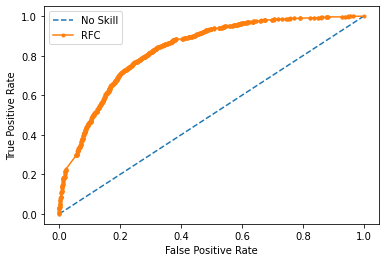

In [ ]:
ns_probs = [0 for _ in range(len(y_test_masked))]
lr_probs = y_pred_rfc_proba_masked[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_masked, ns_probs)
rfc_auc = roc_auc_score(y_test_masked, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RFC: ROC AUC=%.3f' % (rfc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_masked, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_masked, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,3,4,5,6,7,8], 'min_samples_split':[2,3,4,5,6,7], 'min_samples_leaf':[2,3,4,5,6,7]}
# parameters = {"n_estimators":[10,20,30,50,70,100,200,300,450,500,700]}
rfc=RandomForestClassifier(random_state=42,n_estimators=500)
clf = GridSearchCV(rfc, parameters)
clf.fit(x_train, y_train)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

## XG Boost Classifier Masked

In [ ]:
x_train_masked.shape

(6680, 1120)

In [ ]:
xgb1 = XGBClassifier(n_estimators=500) 
xgb1.fit(x_train_masked, y_train_masked)
y_pred_xgb_masked=xgb1.predict(x_test_masked)

In [ ]:
acc_xgb_masked = accuracy_score(y_pred_xgb_masked,y_test_masked)
f1_xgb_masked = f1_score(y_pred_xgb_masked,y_test_masked)
aucScore_xgb_masked = roc_auc_score(y_pred_xgb_masked,y_test_masked)

print("Accuracy :" + str(acc_xgb_masked))
print("F1 Score :" + str(f1_xgb_masked))
print("Area Under Curve :" + str(aucScore_xgb_masked))
print(classification_report(y_pred_xgb_masked,y_test_masked))

Accuracy :0.7552374301675978
F1 Score :0.7002992731936726
Area Under Curve :0.7519296995301356
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79      1753
         1.0       0.67      0.74      0.70      1111

    accuracy                           0.76      2864
   macro avg       0.74      0.75      0.75      2864
weighted avg       0.76      0.76      0.76      2864



## Light GBM Masked

In [ ]:
lgbm = LGBMClassifier(n_estimators=450)
lgbm.fit(x_train_masked, y_train_masked)
y_pred_lgbm_masked=lgbm.predict(x_test_masked)

In [ ]:
acc_lgbm_masked = accuracy_score(y_pred_lgbm_masked,y_test_masked)
f1_lgbm_masked = f1_score(y_pred_lgbm_masked,y_test_masked)
aucScore_lgbm_masked = roc_auc_score(y_pred_lgbm_masked,y_test_masked)

print("Accuracy :" + str(acc_lgbm_masked))
print("F1 Score :" + str(f1_lgbm_masked))
print("Area Under Curve :" + str(aucScore_lgbm_masked))
print(classification_report(y_pred_lgbm_masked,y_test_masked))

Accuracy :0.75768156424581
F1 Score :0.7011197243755383
Area Under Curve :0.7550800979146655
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80      1770
         1.0       0.66      0.74      0.70      1094

    accuracy                           0.76      2864
   macro avg       0.75      0.76      0.75      2864
weighted avg       0.77      0.76      0.76      2864



## Logistic Regression Masked

In [ ]:
lgr = LogisticRegression(random_state=42)
lgr.fit(x_train_masked, y_train_masked)
y_pred_lgr_masked=lgr.predict(x_test_masked)

In [ ]:
acc_lgr_masked = accuracy_score(y_pred_lgr_masked,y_test_masked)
f1_lgr_masked = f1_score(y_pred_lgr_masked,y_test_masked)
aucScore_lgr_masked = roc_auc_score(y_pred_lgr_masked,y_test_masked)

print("Accuracy :" + str(acc_lgr_masked))
print("F1 Score :" + str(f1_lgr_masked))
print("Area Under Curve :" + str(aucScore_lgr_masked))
print(classification_report(y_pred_lgr_masked,y_test_masked))

Accuracy :0.6190642458100558
F1 Score :0.5122932498882431
Area Under Curve :0.6073946342753493
              precision    recall  f1-score   support

         0.0       0.73      0.65      0.69      1855
         1.0       0.47      0.57      0.51      1009

    accuracy                           0.62      2864
   macro avg       0.60      0.61      0.60      2864
weighted avg       0.64      0.62      0.63      2864



## SVM Masked

In [ ]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(x_train_masked, y_train_masked)

y_pred_svm_masked=svm.predict(x_test_masked)
accuracy_score_matrix_lr=(accuracy_score(y_test_masked,y_pred_svm_masked))

In [ ]:
acc_svm_masked = accuracy_score(y_pred_svm_masked,y_test_masked)
f1_svm_masked = f1_score(y_pred_svm_masked,y_test_masked)
aucScore_svm_masked = roc_auc_score(y_pred_svm_masked,y_test_masked)

print("Accuracy :" + str(acc_svm_masked))
print("F1 Score :" + str(f1_svm_masked))
print("Area Under Curve :" + str(aucScore_svm_masked))
print(classification_report(y_pred_svm_masked,y_test_masked))

Accuracy :0.7126396648044693
F1 Score :0.639509417433202
Area Under Curve :0.7083264561866811
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      1809
         1.0       0.59      0.69      0.64      1055

    accuracy                           0.71      2864
   macro avg       0.70      0.71      0.70      2864
weighted avg       0.73      0.71      0.72      2864



## Comparitive Analysis Of Masked

Text(0.5, 1.0, 'Comparing Accuracies')

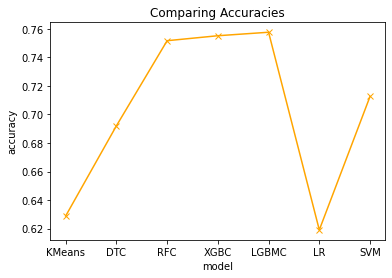

In [ ]:
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[acc_kmeans_masked,acc_dtc_masked,acc_rfc_masked,acc_xgb_masked,acc_lgbm_masked,acc_lgr_masked,acc_svm_masked],marker='x',color='orange')
plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('Comparing Accuracies')

Text(0.5, 1.0, 'Comparing F1 Scores')

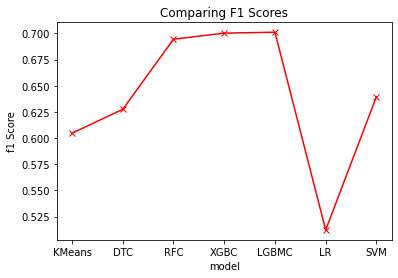

In [ ]:
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[f1_kmeans_masked,f1_dtc_masked,f1_rfc_masked,f1_xgb_masked,f1_lgbm_masked,f1_lgr_masked,f1_svm_masked],marker='x',color='red')
plt.xlabel('model')
plt.ylabel('f1 Score')
plt.title('Comparing F1 Scores')

Text(0.5, 1.0, 'Comparing AUC')

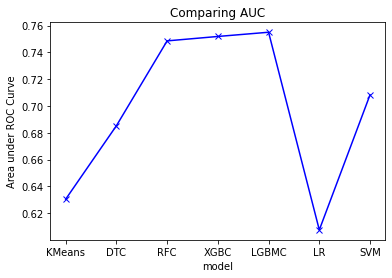

In [ ]:
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[aucScore_kmeans_masked,aucScore_dtc_masked,aucScore_rfc_masked,aucScore_xgb_masked,aucScore_lgbm_masked,aucScore_lgr_masked,aucScore_svm_masked],marker='x',color='blue')
plt.xlabel('model')
plt.ylabel('Area under ROC Curve')
plt.title('Comparing AUC')

## Creating a Pandas Dataset

In [ ]:
# def tensor_to_array(array_value):
#     return array_value.numpy()

### Training Dataset

In [ ]:
# train_ds_lst=list(train_ds)
# print(len(train_ds_lst))

In [ ]:
# dic1={}
# c=0
# for i in tqdm(range(int(len(train_ds_lst)/6))):
#   for j in range(len(train_ds_lst[i][0])):
#     dic1[c]=np.concatenate((tensor_to_array(train_ds_lst[i][0][j]).flatten(),tensor_to_array(train_ds_lst[i][1][j]).flatten()))
#     c+=1

In [ ]:
# train_array_1=np.array(list(dic1.values()))

In [ ]:
# lst=list(dic1.keys())
# for i in tqdm(range(len(list(dic1.keys())))):
#   train_array=np.append(train_array,dic1[i].reshape(1,50176),axis=0)

In [ ]:
# dic2={}
# c=0
# for i in tqdm(range(int(len(train_ds_lst)/6),int(len(train_ds_lst)/3))):
#   for j in range(len(train_ds_lst[i][0])):
#     dic2[c]=np.concatenate((tensor_to_array(train_ds_lst[i][0][j]).flatten(),tensor_to_array(train_ds_lst[i][1][j]).flatten()))
#     c+=1

In [ ]:
# train_array_2=np.array(list(dic2.values()))

In [ ]:
# dic3={}
# c=0
# for i in tqdm(range(int(len(train_ds_lst)/3),int((3/6)*len(train_ds_lst)))):
#   for j in range(len(train_ds_lst[i][0])):
#     dic3[c]=np.concatenate((tensor_to_array(train_ds_lst[i][0][j]).flatten(),tensor_to_array(train_ds_lst[i][1][j]).flatten()))
#     c+=1

In [ ]:
# train_array_3=np.array(list(dic3.values()))

In [ ]:
# dic4={}
# c=0
# for i in tqdm(range(int((3/6)*len(train_ds_lst)),int((4/6)*len(train_ds_lst)))):
#   for j in range(len(train_ds_lst[i][0])):
#     dic4[c]=np.concatenate((tensor_to_array(train_ds_lst[i][0][j]).flatten(),tensor_to_array(train_ds_lst[i][1][j]).flatten()))
#     c+=1

In [ ]:
# train_array_4=np.array(list(dic4.values()))

In [ ]:
# dic5={}
# c=0
# for i in tqdm(range(int((4/6)*len(train_ds_lst)),int((5/6)*len(train_ds_lst)))):
#   for j in range(len(train_ds_lst[i][0])):
#     dic5[c]=np.concatenate((tensor_to_array(train_ds_lst[i][0][j]).flatten(),tensor_to_array(train_ds_lst[i][1][j]).flatten()))
#     c+=1

In [ ]:
# train_array_5=np.array(list(dic5.values()))

In [ ]:
# dic6={}
# c=0
# for i in tqdm(range(int((5/6)*len(train_ds_lst)),int(len(train_ds_lst)))):
#   for j in range(len(train_ds_lst[i][0])):
#     dic6[c]=np.concatenate((tensor_to_array(train_ds_lst[i][0][j]).flatten(),tensor_to_array(train_ds_lst[i][1][j]).flatten()))
#     c+=1

In [ ]:
# train_array_6=np.array(list(dic6.values()))

In [ ]:
# train_array_temp=np.concatenate((train_array_6,train_array_5),axis=0)
# train_array_temp=np.concatenate((train_array_temp,train_array_4),axis=0)
# train_array_temp=np.concatenate((train_array_temp,train_array_3),axis=0)
# train_array_temp=np.concatenate((train_array_temp,train_array_2),axis=0)
# train_array=np.concatenate((train_array_temp,train_array_1),axis=0)

In [ ]:
# train_array.shape

In [ ]:
# dic_label_1={}
# c=0
# for i in tqdm(range(int(len(train_ds_lst)/6))):
#   for j in range(len(train_ds_lst[i][1])):
#     dic_label_1[c]=tensor_to_array(train_ds_lst[i][1][j]).flatten()
#     c+=1

100%|██████████| 39/39 [00:00<00:00, 94.41it/s]


In [ ]:
# dic_label_2={}
# c=0
# for i in tqdm(range(int(len(train_ds_lst)/6),int(len(train_ds_lst)/3))):
#   for j in range(len(train_ds_lst[i][1])):
#     dic_label_2[c]=tensor_to_array(train_ds_lst[i][1][j]).flatten()
#     c+=1

100%|██████████| 40/40 [00:00<00:00, 105.05it/s]


In [ ]:
# dic_label_3={}
# c=0
# for i in tqdm(range(int(len(train_ds_lst)/3),int((3/6)*len(train_ds_lst)))):
#   for j in range(len(train_ds_lst[i][1])):
#     dic_label_3[c]=tensor_to_array(train_ds_lst[i][1][j]).flatten()
#     c+=1

100%|██████████| 40/40 [00:00<00:00, 100.22it/s]


In [ ]:
# dic_label_4={}
# c=0
# for i in tqdm(range(int((3/6)*len(train_ds_lst)),int((4/6)*len(train_ds_lst)))):
#   for j in range(len(train_ds_lst[i][1])):
#     dic_label_4[c]=tensor_to_array(train_ds_lst[i][1][j]).flatten()
#     c+=1

100%|██████████| 40/40 [00:00<00:00, 108.56it/s]


In [ ]:
# dic_label_5={}
# c=0
# for i in tqdm(range(int((4/6)*len(train_ds_lst)),int((5/6)*len(train_ds_lst)))):
#   for j in range(len(train_ds_lst[i][1])):
#     dic_label_5[c]=tensor_to_array(train_ds_lst[i][1][j]).flatten()
#     c+=1

100%|██████████| 40/40 [00:00<00:00, 104.81it/s]


In [ ]:
# dic_label_6={}
# c=0
# for i in tqdm(range(int((5/6)*len(train_ds_lst)),int(len(train_ds_lst)))):
#   for j in range(len(train_ds_lst[i][1])):
#     dic_label_6[c]=tensor_to_array(train_ds_lst[i][1][j]).flatten()
#     c+=1

100%|██████████| 40/40 [00:00<00:00, 95.14it/s]


In [ ]:
# training_data1=pd.DataFrame.from_dict(dic1)
# training_data1=training_data1.T.reset_index(drop=True)
# training_data1

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.137755,15.025513,21.571434,25.066328,31.015306,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,15.785714,26.000000,33.928570,42.750000,48.142853,53.000000,72.107147,83.571426,91.000000,95.928566,...,14.000000,16.000000,17.000000,18.000000,18.000000,18.535767,20.000000,20.000000,19.000000,20.0
2,52.000000,55.494900,74.056122,89.035713,72.785706,54.494896,57.474491,71.785721,68.362244,47.642845,...,14.000000,15.000000,15.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,5.000000,6.892857,6.000000,8.000000,8.000000,7.607141,8.000000,8.000000,8.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,12.553572,14.000000,15.000000,15.000000,14.000000,16.000000,18.214287,254.392853,7.160698,18.410717,...,2.517822,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1244,34.329174,35.620537,38.310268,40.476074,42.080357,44.183384,45.631695,47.609375,48.290249,50.482140,...,1.609375,1.609375,1.609375,1.609375,1.609375,1.609375,1.390625,0.726212,1.609375,2.0
1245,22.554926,28.321827,33.752472,41.131138,48.589287,55.738121,57.281490,59.734623,70.000000,67.605782,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1246,98.687500,103.794647,156.241074,164.250000,151.455353,155.696426,153.375000,154.669647,153.223206,148.580368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
# data_label_1=pd.DataFrame.from_dict(dic_label_1)
# data_label_1=data_label_1.T.reset_index(drop=True)
# data_label_1=data_label_1.rename(columns={0:'label'})

In [ ]:
# training_data_1=pd.concat([training_data1,data_label_1],axis=1)
training_data_1.to_csv('training_data_1_covid19.csv')
!cp training_data_1_covid19.csv "drive/MyDrive/PRML Course Project COVID-19 Using chest xray/"

In [ ]:
# training_data2=pd.DataFrame.from_dict(dic2)
# training_data2=training_data2.T.reset_index(drop=True)

In [ ]:
# data_label_2=pd.DataFrame.from_dict(dic_label_2)
# data_label_2=data_label_2.T.reset_index(drop=True)
# data_label_2=data_label_2.rename(columns={0:'label'})

In [ ]:
# training_data_2=pd.concat([training_data2,data_label_2],axis=1)
# training_data_2.to_csv('training_data_2_covid19.csv')
# !cp training_data_2_covid19.csv "drive/MyDrive/PRML Course Project COVID-19 Using chest xray/"

In [ ]:
# training_data3=pd.DataFrame.from_dict(dic3)
# training_data3=training_data3.T.reset_index(drop=True)

In [ ]:
# data_label_3=pd.DataFrame.from_dict(dic_label_3)
# data_label_3=data_label_3.T.reset_index(drop=True)
# data_label_3=data_label_3.rename(columns={0:'label'})

In [ ]:
# training_data_3=pd.concat([training_data3,data_label_3],axis=1)
# training_data_3.to_csv('training_data_3_covid19.csv')
# !cp training_data_3_covid19.csv "drive/MyDrive/PRML Course Project COVID-19 Using chest xray/"

In [ ]:
# training_data4=pd.DataFrame.from_dict(dic4)
# training_data4=training_data4.T.reset_index(drop=True)

In [ ]:
# data_label_4=pd.DataFrame.from_dict(dic_label_4)
# data_label_4=data_label_4.T.reset_index(drop=True)
# data_label_4=data_label_4.rename(columns={0:'label'})

In [ ]:
# training_data_4=pd.concat([training_data4,data_label_4],axis=1)
# training_data_4.to_csv('training_data_4_covid19.csv')
# !cp training_data_4_covid19.csv "drive/MyDrive/PRML Course Project COVID-19 Using chest xray/"

In [ ]:
# training_data5=pd.DataFrame.from_dict(dic5)
# training_data5=training_data5.T.reset_index(drop=True)

In [ ]:
# data_label_5=pd.DataFrame.from_dict(dic_label_5)
# data_label_5=data_label_5.T.reset_index(drop=True)
# data_label_5=data_label_5.rename(columns={0:'label'})

In [ ]:
# training_data_5=pd.concat([training_data5,data_label_5],axis=1)
# training_data_5.to_csv('training_data_5_covid19.csv')
# !cp training_data_5_covid19.csv "drive/MyDrive/PRML Course Project COVID-19 Using chest xray/"

In [ ]:
# training_data6=pd.DataFrame.from_dict(dic6)
# training_data6=training_data6.T.reset_index(drop=True)

In [ ]:
# data_label_6=pd.DataFrame.from_dict(dic_label_6)
# data_label_6=data_label_6.T.reset_index(drop=True)
# data_label_6=data_label_6.rename(columns={0:'label'})

In [ ]:
# training_data_6=pd.concat([training_data6,data_label_6],axis=1)
# training_data_6.to_csv('training_data_6_covid19.csv')
# !cp training_data_6_covid19.csv "drive/MyDrive/PRML Course Project COVID-19 Using chest xray/"

In [ ]:
# train_data=pd.concat([training_data1,training_data2,training_data3,training_data4,training_data5,training_data6])

In [ ]:
# label_data=pd.concat([data_label_1,data_label_2,data_label_3,data_label_4,data_label_5,data_label_6])

In [ ]:
# train_data=pd.concat([train_data,label_data],axis=1)

In [ ]:
# train_data

,0,1,2,3,4,5,6,7,8,9,...,50167,50168,50169,50170,50171,50172,50173,50174,50175,label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.137755,15.025513,21.571434,25.066328,31.015306,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1
1,15.785714,26.000000,33.928570,42.750000,48.142853,53.000000,72.107147,83.571426,91.000000,95.928566,...,16.000000,17.000000,18.000000,18.000000,18.535767,20.000000,20.00000,19.000000,20.000000,0
2,52.000000,55.494900,74.056122,89.035713,72.785706,54.494896,57.474491,71.785721,68.362244,47.642845,...,15.000000,15.000000,17.000000,17.000000,17.000000,17.000000,17.00000,17.000000,17.000000,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
4,5.000000,6.892857,6.000000,8.000000,8.000000,7.607141,8.000000,8.000000,8.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,76.709183,79.107140,77.770401,85.178574,88.229591,90.352043,94.520409,93.734688,97.005104,98.969398,...,19.637684,12.188526,2.045922,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1
1256,21.357143,24.642859,29.086735,34.535713,45.698986,49.714283,52.025513,57.188786,62.280613,65.147964,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1
1257,90.000000,89.705353,89.565926,89.000000,90.000000,89.000000,91.000000,91.000000,90.000000,90.000000,...,147.562622,147.232178,148.594742,146.392822,147.116089,148.116089,149.00000,148.589355,146.116089,0
1258,102.622452,94.362244,94.000000,91.000000,94.204086,93.229591,97.137756,96.811218,99.275513,124.051033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1


In [ ]:
# train_data.to_csv('train_data_covid19.csv')
# !cp train_data_covid19.csv "drive/MyDrive/PRML Course Project COVID-19 Using chest xray/"

### Validation Dataset

In [ ]:
# val_ds_lst=list(val_ds)
# print(len(val_ds_lst))

60


In [ ]:
# dic={}
# c=0
# for i in tqdm(range(len(val_ds_lst))):
#   for j in range(len(val_ds_lst[i][0])):
#     dic[c]=tensor_to_array(val_ds_lst[i][0][j]).flatten()
#     c+=1

100%|██████████| 60/60 [00:01<00:00, 39.53it/s]


In [ ]:
# dic_label={}
# c=0
# for i in tqdm(range(len(val_ds_lst))):
#   for j in range(len(val_ds_lst[i][1])):
#     dic_label[c]=tensor_to_array(val_ds_lst[i][1][j]).flatten()
#     c+=1

100%|██████████| 60/60 [00:00<00:00, 92.88it/s]


In [ ]:
# validation_data=pd.DataFrame.from_dict(dic)
# validation_data=validation_data.T.reset_index(drop=True)
# validation_data

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,177.668365,216.642853,215.229584,205.107147,205.785706,184.571426,163.357147,161.214279,159.000000,160.000000,...,140.928467,116.999939,76.713867,74.382668,65.780617,54.214233,39.499817,29.714111,15.714233,4.402882
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.142849,5.285706,4.285698,8.571430,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,26.857143,29.964287,30.321426,34.142857,38.160713,39.311222,39.375000,42.770409,46.938778,50.461720,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,15.000000,15.000000,15.000000,15.464286,14.000000,14.000000,13.803570,13.000000,13.000000,13.000000,...,5.000000,6.000000,7.000000,7.803589,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,10.214286,5.642857,11.857143,17.500000,19.071430,23.719389,27.000000,31.000000,32.357143,37.857147,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1903,54.000000,52.846939,50.785713,49.464287,51.086735,47.846943,45.459183,40.954079,41.198982,42.229591,...,115.678703,119.423569,124.555901,65.529205,35.642578,21.443651,3.321398,0.000000,0.000000,0.000000
1904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1905,215.000000,213.642853,213.000000,210.500000,210.000000,210.000000,210.000000,209.000000,210.357147,211.000000,...,21.000000,21.642883,25.000000,26.000000,22.642822,24.000000,24.499939,24.000000,23.923450,28.214355


In [ ]:
# data_label=pd.DataFrame.from_dict(dic_label)
# data_label=data_label.T.reset_index(drop=True)
# data_label=data_label.rename(columns={0:'label'})
# data_label

,label
0,1
1,0
2,0
3,0
4,0
...,...
1902,1
1903,1
1904,1
1905,1


In [ ]:
# validation_data=pd.concat([validation_data,data_label],axis=1)
# validation_data

,0,1,2,3,4,5,6,7,8,9,...,50167,50168,50169,50170,50171,50172,50173,50174,50175,label
0,177.668365,216.642853,215.229584,205.107147,205.785706,184.571426,163.357147,161.214279,159.000000,160.000000,...,116.999939,76.713867,74.382668,65.780617,54.214233,39.499817,29.714111,15.714233,4.402882,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.142849,5.285706,4.285698,8.571430,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,26.857143,29.964287,30.321426,34.142857,38.160713,39.311222,39.375000,42.770409,46.938778,50.461720,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,15.000000,15.000000,15.000000,15.464286,14.000000,14.000000,13.803570,13.000000,13.000000,13.000000,...,6.000000,7.000000,7.803589,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,10.214286,5.642857,11.857143,17.500000,19.071430,23.719389,27.000000,31.000000,32.357143,37.857147,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1903,54.000000,52.846939,50.785713,49.464287,51.086735,47.846943,45.459183,40.954079,41.198982,42.229591,...,119.423569,124.555901,65.529205,35.642578,21.443651,3.321398,0.000000,0.000000,0.000000,1
1904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1905,215.000000,213.642853,213.000000,210.500000,210.000000,210.000000,210.000000,209.000000,210.357147,211.000000,...,21.642883,25.000000,26.000000,22.642822,24.000000,24.499939,24.000000,23.923450,28.214355,1


In [ ]:
# validation_data.to_csv('validation_data_covid19.csv')
# !cp validation_data_covid19.csv "drive/MyDrive/PRML Course Project COVID-19 Using chest xray/"

# Comparitive Analysis of Performance on Masked and Unmasked Images

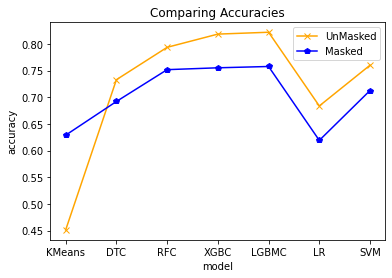

In [ ]:
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[acc_kmeans,acc_dtc,acc_rfc,acc_xgb,acc_lgbm,acc_lgr,acc_svm],marker='x',color='orange')
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[acc_kmeans_masked,acc_dtc_masked,acc_rfc_masked,acc_xgb_masked,acc_lgbm_masked,acc_lgr_masked,acc_svm_masked],marker='p',color='blue')
plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('Comparing Accuracies')
plt.legend(['UnMasked','Masked'],loc='best')

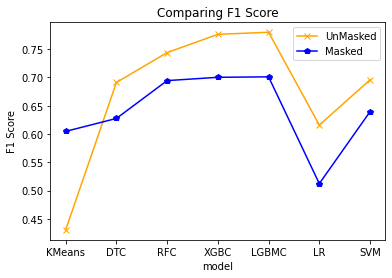

In [ ]:
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[f1_kmeans,f1_dtc,f1_rfc,f1_xgb,f1_lgbm,f1_lgr,f1_svm],marker='x',color='orange')
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[f1_kmeans_masked,f1_dtc_masked,f1_rfc_masked,f1_xgb_masked,f1_lgbm_masked,f1_lgr_masked,f1_svm_masked],marker='p',color='blue')
plt.xlabel('model')
plt.ylabel('F1 Score')
plt.title('Comparing F1 Score')
plt.legend(['UnMasked','Masked'],loc='best')

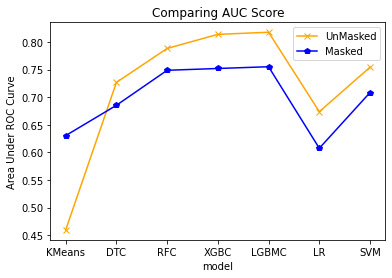

In [ ]:
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[aucScore_kmeans,aucScore_dtc,aucScore_rfc,aucScore_xgb,aucScore_lgbm,aucScore_lgr,aucScore_svm],marker='x',color='orange')
plt.plot(['KMeans','DTC','RFC','XGBC','LGBMC','LR','SVM'],[aucScore_kmeans_masked,aucScore_dtc_masked,aucScore_rfc_masked,aucScore_xgb_masked,aucScore_lgbm_masked,aucScore_lgr_masked,aucScore_svm_masked],marker='p',color='blue')
plt.xlabel('model')
plt.ylabel('Area Under ROC Curve')
plt.title('Comparing AUC Score')
plt.legend(['UnMasked','Masked'],loc='best')

# Deep Learning Models - CNN

## Pre Processing

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds_normal.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99994004


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## VGG-19 Architechture with final max pooling UnMasked

In [ ]:
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(224,224,1)))
model.add(MaxPooling2D())
model.add(Conv2D(128, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(256, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(512, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(2,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/25
239/239 [==============================] - 658s 3s/step - loss: 1.6344 - accuracy: 0.7623 - val_loss: 0.3841 - val_accuracy: 0.8395
Epoch 2/25
239/239 [==============================] - 102s 417ms/step - loss: 0.3363 - accuracy: 0.8601 - val_loss: 0.3269 - val_accuracy: 0.8768
Epoch 3/25
239/239 [==============================] - 100s 409ms/step - loss: 0.3078 - accuracy: 0.8761 - val_loss: 0.3511 - val_accuracy: 0.8715
Epoch 4/25
239/239 [==============================] - 99s 404ms/step - loss: 0.2429 - accuracy: 0.9053 - val_loss: 0.2935 - val_accuracy: 0.8962
Epoch 5/25
239/239 [==============================] - 97s 397ms/step - loss: 0.2035 - accuracy: 0.9215 - val_loss: 0.3591 - val_accuracy: 0.8977
Epoch 6/25
239/239 [==============================] - 98s 400ms/step - loss: 0.1767 - accuracy: 0.9300 - val_loss: 0.3548 - val_accuracy: 0.8920
Epoch 7/25
239/239 [==============================] - 100s 407ms/step - loss: 0.1578 - accuracy: 0.9404 - val_loss: 0.3418 - val_a

In [ ]:
hist_vgg19 = pd.DataFrame(history.history)
hist_vgg19['epoch'] = history.epoch
hist_vgg19.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
20,0.092213,0.969192,0.433274,0.900891,20
21,0.069446,0.975747,0.445010,0.904038,21
22,0.083973,0.970503,0.470795,0.909806,22
23,0.113306,0.962113,0.489632,0.893550,23
24,0.143312,0.954248,0.496128,0.894599,24


Text(0.5, 1.0, 'Training accuracy variation with epochs')

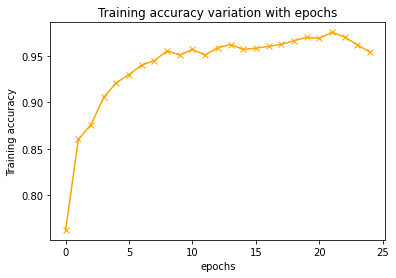

In [ ]:
plt.plot(hist_vgg19['accuracy'],marker='x',color='orange')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')

Text(0.5, 1.0, 'Validation accuracy variation with epochs')

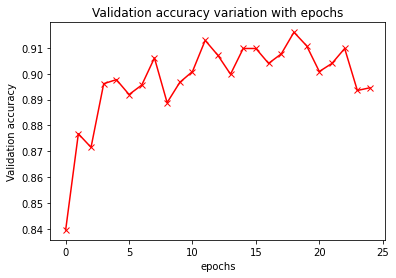

In [ ]:
plt.plot(hist_vgg19['val_accuracy'],marker='x',color='red')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy variation with epochs')

Text(0.5, 1.0, 'Loss variation with epochs')

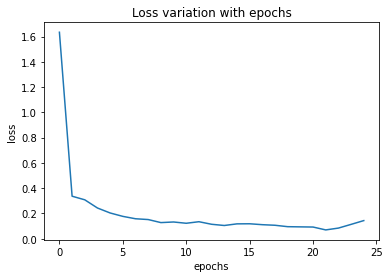

In [ ]:
plt.plot(hist_vgg19['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss variation with epochs')

In [ ]:
# model.save("model2.h5")

In [ ]:
# !pip install tensorflowjs
# !tensorflowjs_converter --input_format keras '/content/model2.h5' '/content/model2'

##VGG-19 Architechture with final max pooling Masked

In [ ]:
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(224,224,1)))
model.add(MaxPooling2D())
model.add(Conv2D(128, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(256, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(512, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(2,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 256)     

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history= model.fit(
  train_ds_masked,
  validation_data=val_ds_masked,
  epochs=25
)

Epoch 1/25
239/239 [==============================] - 769s 3s/step - loss: 2.0640 - accuracy: 0.7040 - val_loss: 0.4848 - val_accuracy: 0.7427
Epoch 2/25
239/239 [==============================] - 60s 248ms/step - loss: 0.4722 - accuracy: 0.7676 - val_loss: 0.4688 - val_accuracy: 0.7830
Epoch 3/25
239/239 [==============================] - 60s 249ms/step - loss: 0.4253 - accuracy: 0.7960 - val_loss: 0.4464 - val_accuracy: 0.7956
Epoch 4/25
239/239 [==============================] - 60s 248ms/step - loss: 0.3948 - accuracy: 0.8148 - val_loss: 0.4609 - val_accuracy: 0.7778
Epoch 5/25
239/239 [==============================] - 60s 248ms/step - loss: 0.3586 - accuracy: 0.8368 - val_loss: 0.5421 - val_accuracy: 0.7642
Epoch 6/25
239/239 [==============================] - 60s 249ms/step - loss: 0.3334 - accuracy: 0.8539 - val_loss: 0.5331 - val_accuracy: 0.7830
Epoch 7/25
239/239 [==============================] - 60s 249ms/step - loss: 0.2973 - accuracy: 0.8663 - val_loss: 0.5998 - val_accu

In [ ]:
hist_vgg19_masked = pd.DataFrame(history.history)
hist_vgg19_masked['epoch'] = history.epoch
hist_vgg19_masked.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
20,0.132020,0.950616,0.879044,0.799266,20
21,0.116398,0.959392,0.915795,0.799266,21
22,0.112571,0.957820,0.888463,0.801887,22
23,0.112619,0.960702,0.952038,0.792977,23
24,0.108477,0.964108,0.983253,0.783019,24


Text(0.5, 1.0, 'Training accuracy variation with epochs')

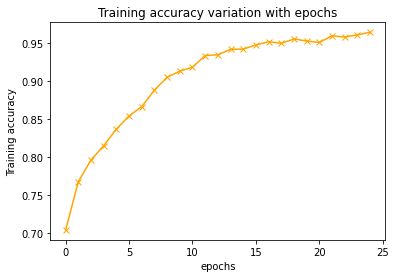

In [ ]:
plt.plot(hist_vgg19_masked['accuracy'],marker='x',color='orange')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')

Text(0.5, 1.0, 'Validation accuracy variation with epochs')

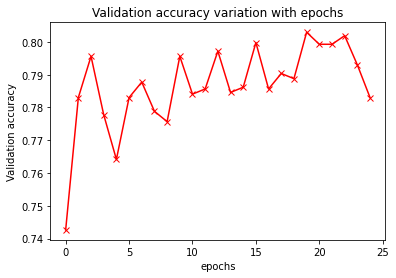

In [ ]:
plt.plot(hist_vgg19_masked['val_accuracy'],marker='x',color='red')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy variation with epochs')

Text(0.5, 1.0, 'Loss variation with epochs')

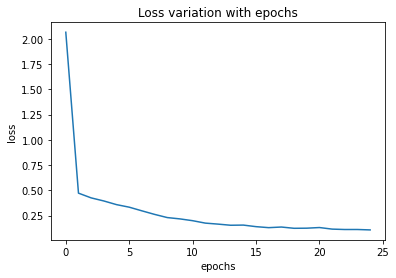

In [ ]:
plt.plot(hist_vgg19_masked['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss variation with epochs')

## Comparision VGG-19 Masked and Unmasked

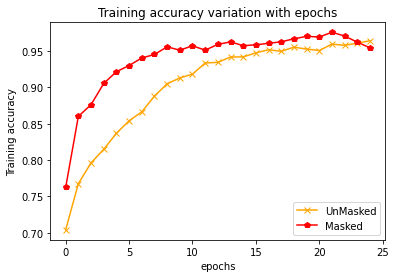

In [ ]:
plt.plot(hist_vgg19_masked['accuracy'],marker='x',color='orange')
plt.plot(hist_vgg19['accuracy'],marker='p',color='red')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')
plt.legend(['Masked','UnMasked'],loc='best')

## ResNet 50 UnMasked

In [20]:
base_model=tf.keras.applications.resnet50.ResNet50(weights='imagenet',include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [21]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [22]:
x = base_model.output
x = GlobalMaxPooling2D()(x)
x=Dense(2, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = x)

In [23]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [24]:
history = model.fit(
  train_ds_normal,
  validation_data=val_ds_normal,
  epochs=20
)

Epoch 1/20
239/239 [==============================] - 755s 3s/step - loss: 1.3088 - accuracy: 0.7862 - val_loss: 0.8233 - val_accuracy: 0.6953
Epoch 2/20
239/239 [==============================] - 189s 778ms/step - loss: 0.5202 - accuracy: 0.8609 - val_loss: 157.6628 - val_accuracy: 0.5700
Epoch 3/20
239/239 [==============================] - 189s 778ms/step - loss: 0.7388 - accuracy: 0.8348 - val_loss: 0.4789 - val_accuracy: 0.8112
Epoch 4/20
239/239 [==============================] - 188s 776ms/step - loss: 0.4051 - accuracy: 0.8608 - val_loss: 0.7184 - val_accuracy: 0.6240
Epoch 5/20
239/239 [==============================] - 188s 776ms/step - loss: 0.6032 - accuracy: 0.8422 - val_loss: 3.3311 - val_accuracy: 0.4358
Epoch 6/20
239/239 [==============================] - 188s 775ms/step - loss: 0.5280 - accuracy: 0.8437 - val_loss: 0.3676 - val_accuracy: 0.8521
Epoch 7/20
239/239 [==============================] - 188s 775ms/step - loss: 0.5671 - accuracy: 0.8557 - val_loss: 2.1886 - 

In [25]:
hist_resnet50 = pd.DataFrame(history.history)
hist_resnet50['epoch'] = history.epoch
hist_resnet50.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
15,0.252357,0.926193,3.876252,0.731515,15
16,0.184749,0.939303,0.261581,0.906660,16
17,0.237471,0.934845,1.140352,0.730467,17
18,0.224029,0.935107,1.827623,0.692711,18
19,0.210116,0.942449,0.316957,0.899318,19


Text(0.5, 1.0, 'Training accuracy variation with epochs')

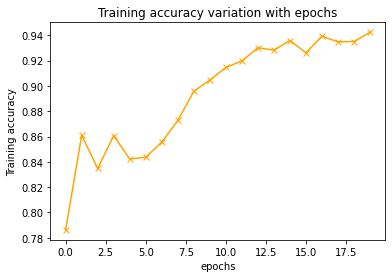

In [26]:
plt.plot(hist_resnet50['accuracy'],marker='x',color='orange')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')

Text(0.5, 1.0, 'Validation accuracy variation with epochs')

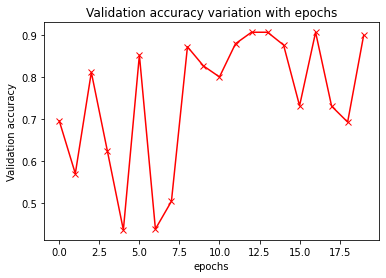

In [27]:
plt.plot(hist_resnet50['val_accuracy'],marker='x',color='red')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy variation with epochs')

Text(0.5, 1.0, 'Loss variation with epochs')

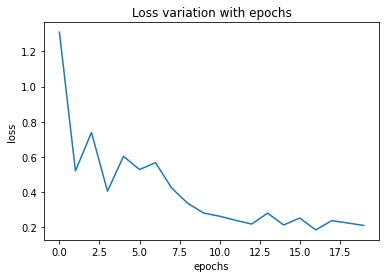

In [28]:
plt.plot(hist_resnet50['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss variation with epochs')

In [29]:
# model.save("resnet50.h5")

In [30]:
# !pip install tensorflowjs
# !tensorflowjs_converter --input_format keras '/content/resnet50.h5' '/content/resnet50'

## ResNet 50 Masked

In [31]:
base_model=tf.keras.applications.resnet50.ResNet50(weights='imagenet',include_top=False)

In [32]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [33]:
x = base_model.output
x = GlobalMaxPooling2D()(x)
x=Dense(2, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = x)

In [34]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [35]:
history = model.fit(
  train_ds_masked_rgb,
  validation_data=val_ds_masked_rgb,
  epochs=20
)

Epoch 1/20
239/239 [==============================] - 781s 3s/step - loss: 2.4725 - accuracy: 0.6381 - val_loss: 2.3699 - val_accuracy: 0.4135
Epoch 2/20
239/239 [==============================] - 176s 734ms/step - loss: 0.7480 - accuracy: 0.6867 - val_loss: 87.0610 - val_accuracy: 0.5299
Epoch 3/20
239/239 [==============================] - 176s 734ms/step - loss: 1.0946 - accuracy: 0.7012 - val_loss: 0.6120 - val_accuracy: 0.6829
Epoch 4/20
239/239 [==============================] - 176s 734ms/step - loss: 0.8151 - accuracy: 0.7378 - val_loss: 1.8410 - val_accuracy: 0.5739
Epoch 5/20
239/239 [==============================] - 176s 735ms/step - loss: 0.5215 - accuracy: 0.7560 - val_loss: 0.5093 - val_accuracy: 0.7311
Epoch 6/20
239/239 [==============================] - 176s 735ms/step - loss: 0.4400 - accuracy: 0.7899 - val_loss: 0.6078 - val_accuracy: 0.6593
Epoch 7/20
239/239 [==============================] - 176s 734ms/step - loss: 0.4411 - accuracy: 0.7907 - val_loss: 0.9781 - v

In [36]:
hist_resnet50_masked = pd.DataFrame(history.history)
hist_resnet50_masked['epoch'] = history.epoch
hist_resnet50_masked.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
15,0.927715,0.676316,0.637726,0.651468,15
16,0.789046,0.688237,7.569553,0.436583,16
17,0.721966,0.712602,0.757928,0.435010,17
18,0.688978,0.688499,92.689934,0.571279,18
19,0.617631,0.719937,4.201266,0.623690,19


Text(0.5, 1.0, 'Training accuracy variation with epochs')

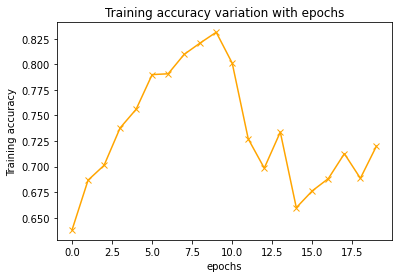

In [37]:
plt.plot(hist_resnet50_masked['accuracy'],marker='x',color='orange')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')

Text(0.5, 1.0, 'Validation accuracy variation with epochs')

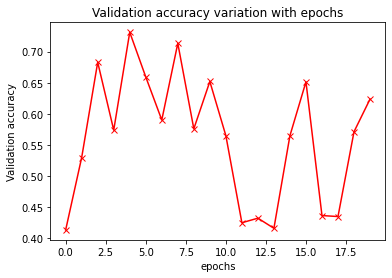

In [38]:
plt.plot(hist_resnet50_masked['val_accuracy'],marker='x',color='red')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy variation with epochs')

Text(0.5, 1.0, 'Loss variation with epochs')

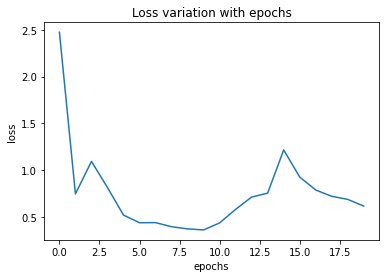

In [39]:
plt.plot(hist_resnet50_masked['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss variation with epochs')

In [40]:
# model.save("resnet50.h5")

In [41]:
# !pip install tensorflowjs
# !tensorflowjs_converter --input_format keras '/content/resnet50.h5' '/content/resnet50'

## EfficientNet B3

In [42]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights="imagenet", input_shape=(224,224,3))

43950080/43941136 [==============================] - 0s 0us/step


In [43]:
base_model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

In [44]:
model= Sequential()
model.add(base_model) 
model.add(MaxPooling2D())
model.add(Flatten()) 
model.add(Dense(2,activation=('softmax'))) 

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1536)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 13824)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 27650     
                                                                 
Total params: 10,811,185
Trainable params: 10,723,882
Non-trainable params: 87,303
_________________________________________________________________


In [46]:
batch_size= 32
epochs=1
learn_rate=.001


In [47]:
sgd=tf.keras.optimizers.SGD(lr=learn_rate,momentum=.9,nesterov=False)

In [48]:
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
history = model.fit(train_ds_normal,validation_data=val_ds_normal,epochs=10)

Epoch 1/10
239/239 [==============================] - 319s 1s/step - loss: 0.3487 - accuracy: 0.8897 - val_loss: 0.6650 - val_accuracy: 0.7976
Epoch 2/10
239/239 [==============================] - 293s 1s/step - loss: 0.1369 - accuracy: 0.9535 - val_loss: 0.2477 - val_accuracy: 0.9255
Epoch 3/10
239/239 [==============================] - 294s 1s/step - loss: 0.0874 - accuracy: 0.9683 - val_loss: 0.2000 - val_accuracy: 0.9528
Epoch 4/10
239/239 [==============================] - 293s 1s/step - loss: 0.0657 - accuracy: 0.9772 - val_loss: 0.1899 - val_accuracy: 0.9570
Epoch 5/10
239/239 [==============================] - 293s 1s/step - loss: 0.0507 - accuracy: 0.9835 - val_loss: 0.1645 - val_accuracy: 0.9617
Epoch 6/10
239/239 [==============================] - 294s 1s/step - loss: 0.0498 - accuracy: 0.9823 - val_loss: 0.1821 - val_accuracy: 0.9528
Epoch 7/10
239/239 [==============================] - 293s 1s/step - loss: 0.0415 - accuracy: 0.9854 - val_loss: 0.2075 - val_accuracy: 0.9518

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [1]:
plt.plot(hist['accuracy'],marker='x',color='orange')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')

NameError: ignored

In [2]:
plt.plot(hist['val_accuracy'],marker='x',color='red')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy variation with epochs')

NameError: ignored

In [ ]:
plt.plot(hist['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss variation with epochs')

In [ ]:
# model.save("efficientNetB3.h5")

In [ ]:
# !pip install tensorflowjs
# !tensorflowjs_converter --input_format keras '/content/efficientNetB3.h5' '/content/efficientNetB3'

## EfficientNet B3 Masked

In [22]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights="imagenet", input_shape=(224,224,3))

43950080/43941136 [==============================] - 1s 0us/step


In [23]:
base_model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

In [24]:
model= Sequential()
model.add(base_model) 
model.add(MaxPooling2D())
model.add(Flatten()) 
model.add(Dense(2,activation=('softmax'))) 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1536)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 13824)             0         
                                                                 
 dense (Dense)               (None, 2)                 27650     
                                                                 
Total params: 10,811,185
Trainable params: 10,723,882
Non-trainable params: 87,303
_________________________________________________________________


In [26]:
batch_size= 32
epochs=1
learn_rate=.001


In [27]:
sgd=tf.keras.optimizers.SGD(lr=learn_rate,momentum=.9,nesterov=False)

In [28]:
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds_masked_rgb,validation_data=val_ds_masked_rgb,epochs=10)

Epoch 1/10


In [ ]:
hist_b3_masked = pd.DataFrame(history.history)
hist_b3_masked['epoch'] = history.epoch
hist_b3_masked.tail()

In [ ]:
plt.plot(hist_b3_masked['accuracy'],marker='x',color='orange')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')

In [ ]:
plt.plot(hist_b3_masked['val_accuracy'],marker='x',color='red')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy variation with epochs')

In [ ]:
plt.plot(hist_b3_masked['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss variation with epochs')

## Comparision B3 Masked and Unmasked

In [ ]:
plt.plot(hist_b3_masked['accuracy'],marker='x',color='orange' )
plt.plot(hist['accuracy'],marker='p',color='red')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')
plt.legend(['Masked','Unmasked'],loc='best')

## Comparision ResNet 50 Masked and Unmasked

In [ ]:
plt.plot(hist_resnet50['accuracy'],marker='x',color='orange' )
plt.plot(hist_resnet50_masked['accuracy'],marker='p',color='red')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')
plt.legend(['UnMasked','Masked'],loc='best')